ASSIGNMENT 3.1

DATE: 30/07/24

1. Recognizing hand-written Digits dataset

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

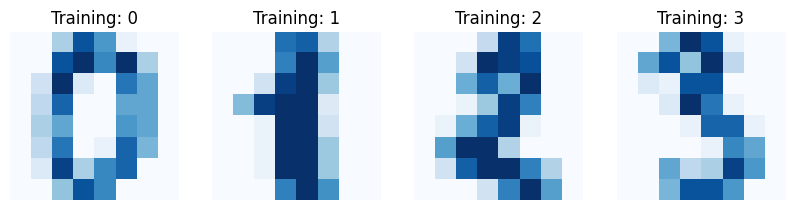

In [44]:
digits = datasets.load_digits()
#print(digits)
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for i in range(4):
    axes[i].set_axis_off()
    axes[i].imshow(digits.images[i], cmap=plt.cm.Blues, interpolation='nearest')
    axes[i].set_title(f'Training: {digits.target[i]}')

In [39]:
n_samples = len(digits.images)
samples_data = digits.images.reshape((n_samples, -1))
#print(samples_data)

classifier = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(samples_data, digits.target, test_size=0.3,shuffle=False)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
#print(predictions)

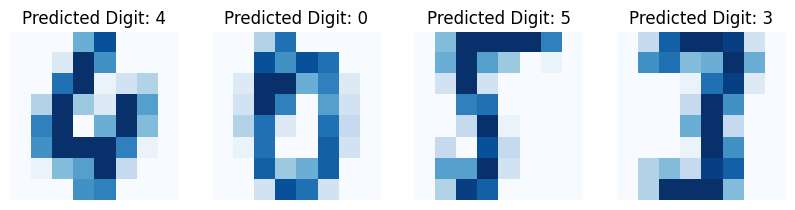

In [40]:
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.Blues, interpolation="nearest")
    ax.set_title(f"Predicted Digit: {prediction}")


In [ ]:
print(f"Classification report for classifier {classifier}:\n")
print(f"{metrics.classification_report(y_test, predictions)}\n")

Classification report for classifier SVC(gamma=0.001):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]



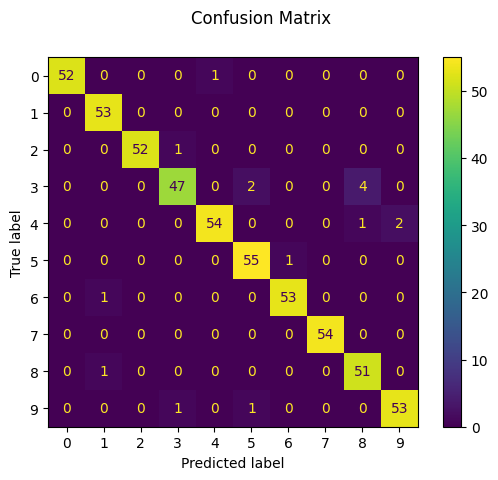

In [ ]:
#Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}\n")

plt.show()

Is this confusion matrix a sparse matrix? Yes it is a sparse matrix as number of 0 elements are higher than non-zero elements

2. Apply SelectKBest on load_digits dataset.Use at least 3 different score_func like chi2, f_classif etc

In [42]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X, y = datasets.load_digits(return_X_y= True)
print("Before applying: ")
print(X.shape)
print("After Applying: ")
X_new = SelectKBest(score_func=chi2, k=25).fit_transform(X, y)
print(X_new.shape)
#X_new = SelectKBest(score_func=f_classif, k=25).fit_transform(X, y)
#print(X_new.shape)
X_new = SelectKBest(score_func=mutual_info_classif, k=25).fit_transform(X, y)
print(X_new.shape)

Before applying: 
(1797, 64)
After Applying: 
(1797, 25)
(1797, 25)


In [43]:
from sklearn.feature_selection import SelectPercentile
A = [5,10,20]
for i in A:
  print(f"percentile value: {i}")
  X_new = SelectPercentile(score_func=chi2, percentile=i).fit_transform(X, y)
  print(X_new.shape)
  #X_new = SelectPercentile(score_func=f_classif, percentile=i).fit_transform(X, y)
  #print(X_new.shape)
  X_new = SelectPercentile(score_func=mutual_info_classif, percentile=i).fit_transform(X, y)
  print(X_new.shape)


percentile value: 5
(1797, 4)
(1797, 4)
percentile value: 10
(1797, 7)
(1797, 7)
percentile value: 20
(1797, 13)
(1797, 13)
